In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("nndb_flat_data.csv")
data.columns = map(str.lower, data.columns)
data.head()

,id,foodgroup,shortdescrip,descrip,commonname,mfgname,scientificname,energy_kcal,protein_g,fat_g,...,folate_usrda,niacin_usrda,riboflavin_usrda,thiamin_usrda,calcium_usrda,copper_usrda,magnesium_usrda,phosphorus_usrda,selenium_usrda,zinc_usrda
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [4]:
data.shape

(8618, 45)

In [6]:
data.describe()

,id,energy_kcal,protein_g,fat_g,carb_g,sugar_g,fiber_g,vita_mcg,vitb6_mg,vitb12_mcg,...,folate_usrda,niacin_usrda,riboflavin_usrda,thiamin_usrda,calcium_usrda,copper_usrda,magnesium_usrda,phosphorus_usrda,selenium_usrda,zinc_usrda
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


In [6]:
data.foodgroup.unique()

array(['Dairy and Egg Products', 'Spices and Herbs', 'Baby Foods',
       'Fats and Oils', 'Poultry Products', 'Soups, Sauces, and Gravies',
       'Sausages and Luncheon Meats', 'Breakfast Cereals', 'Snacks',
       'Fruits and Fruit Juices', 'Pork Products',
       'Vegetables and Vegetable Products', 'Nut and Seed Products',
       'Beef Products', 'Beverages', 'Finfish and Shellfish Products',
       'Legumes and Legume Products', 'Lamb, Veal, and Game Products',
       'Baked Products', 'Sweets', 'Cereal Grains and Pasta',
       'Fast Foods', 'Meals, Entrees, and Side Dishes',
       'American Indian/Alaska Native Foods', 'Restaurant Foods'],
      dtype=object)

Drop ID Extra columns

In [7]:
data.id.unique().shape
data = data.drop(["id", "shortdescrip", "descrip", "commonname", "mfgname","scientificname"], axis = 1)

In [9]:
data.describe()

,energy_kcal,protein_g,fat_g,carb_g,sugar_g,fiber_g,vita_mcg,vitb6_mg,vitb12_mcg,vitc_mg,...,folate_usrda,niacin_usrda,riboflavin_usrda,thiamin_usrda,calcium_usrda,copper_usrda,magnesium_usrda,phosphorus_usrda,selenium_usrda,zinc_usrda
count,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,7.925377,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,57.582758,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,0.000000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,2.500000,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,2400.000000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


# Visualization Corelation Among Features

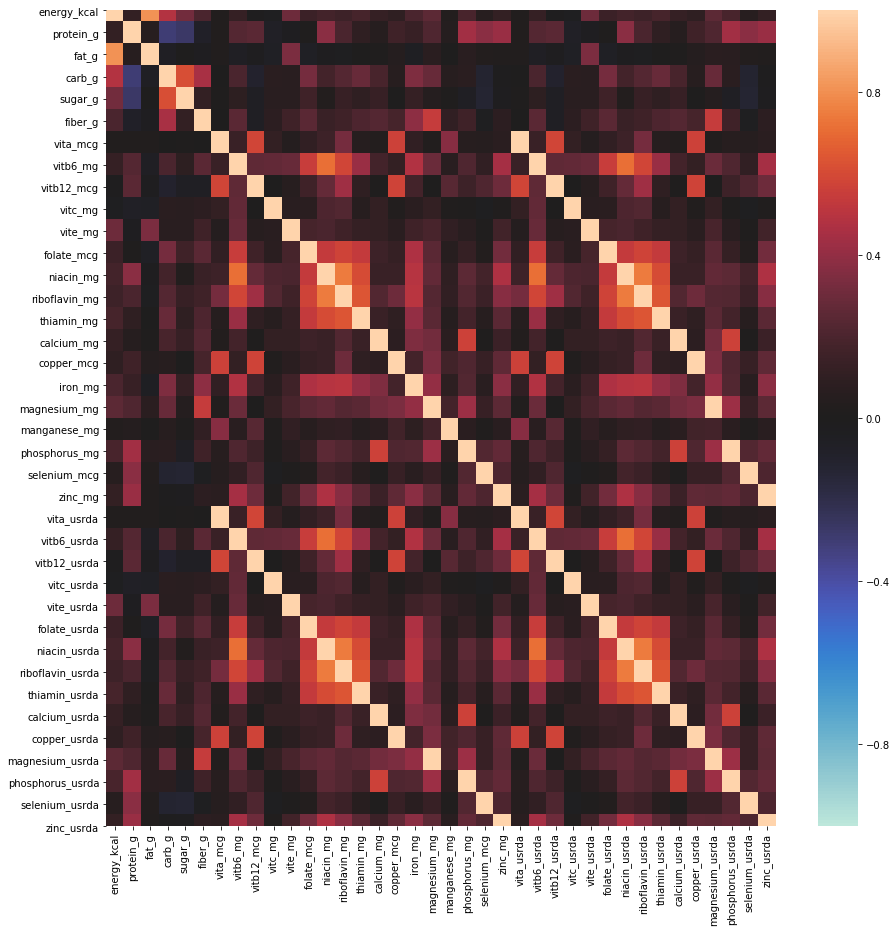

In [10]:
fig, axes = plt.subplots(figsize=(15, 15))
corelation = data.iloc[:, 1:].corr()
graph = sns.heatmap(corelation, vmin=-1, vmax=1, center=0, ax=axes)
plt.show()

# Remove Corelated Features

In [29]:
count =0
for i in range(0, corelation.shape[0]):
    for j in range(i+1, corelation.shape[0]):
        if(abs(corelation.iloc[i, j]) > 0.7):
            print(corelation.columns[i] + " -> "+ corelation.columns[j])
            count += 1
print(count)

energy_kcal -> fat_g
vita_mcg -> vita_usrda
vitb6_mg -> niacin_mg
vitb6_mg -> vitb6_usrda
vitb6_mg -> niacin_usrda
vitb12_mcg -> vitb12_usrda
vitc_mg -> vitc_usrda
vite_mg -> vite_usrda
folate_mcg -> folate_usrda
niacin_mg -> riboflavin_mg
niacin_mg -> vitb6_usrda
niacin_mg -> niacin_usrda
niacin_mg -> riboflavin_usrda
riboflavin_mg -> niacin_usrda
riboflavin_mg -> riboflavin_usrda
thiamin_mg -> thiamin_usrda
calcium_mg -> calcium_usrda
copper_mcg -> copper_usrda
magnesium_mg -> magnesium_usrda
phosphorus_mg -> phosphorus_usrda
selenium_mcg -> selenium_usrda
zinc_mg -> zinc_usrda
vitb6_usrda -> niacin_usrda
niacin_usrda -> riboflavin_usrda
24


There are 24 Variable that are Corelated to each other, Where Mostly X_mg is corelated with X_usrda.
looking for variable corelated to eachother other than _mg and _usrda

In [30]:
count =0
for i in range(0, corelation.shape[0]-15):
    for j in range(i+1, corelation.shape[0]-15):
        if(abs(corelation.iloc[i, j]) > 0.7):
            print(corelation.columns[i] + " -> "+ corelation.columns[j])
            count += 1
print(count)

energy_kcal -> fat_g
vitb6_mg -> niacin_mg
niacin_mg -> riboflavin_mg
3


Removing _USRDA, energy_kcal, niacin_mg and riboflavin_mg

In [31]:
data = data.iloc[:, :24].drop(["energy_kcal", "niacin_mg", "riboflavin_mg"], axis=1)
data.columns

Index(['foodgroup', 'protein_g', 'fat_g', 'carb_g', 'sugar_g', 'fiber_g',
       'vita_mcg', 'vitb6_mg', 'vitb12_mcg', 'vitc_mg', 'vite_mg',
       'folate_mcg', 'thiamin_mg', 'calcium_mg', 'copper_mcg', 'iron_mg',
       'magnesium_mg', 'manganese_mg', 'phosphorus_mg', 'selenium_mcg',
       'zinc_mg'],
      dtype='object')

C:\Users\Muneer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


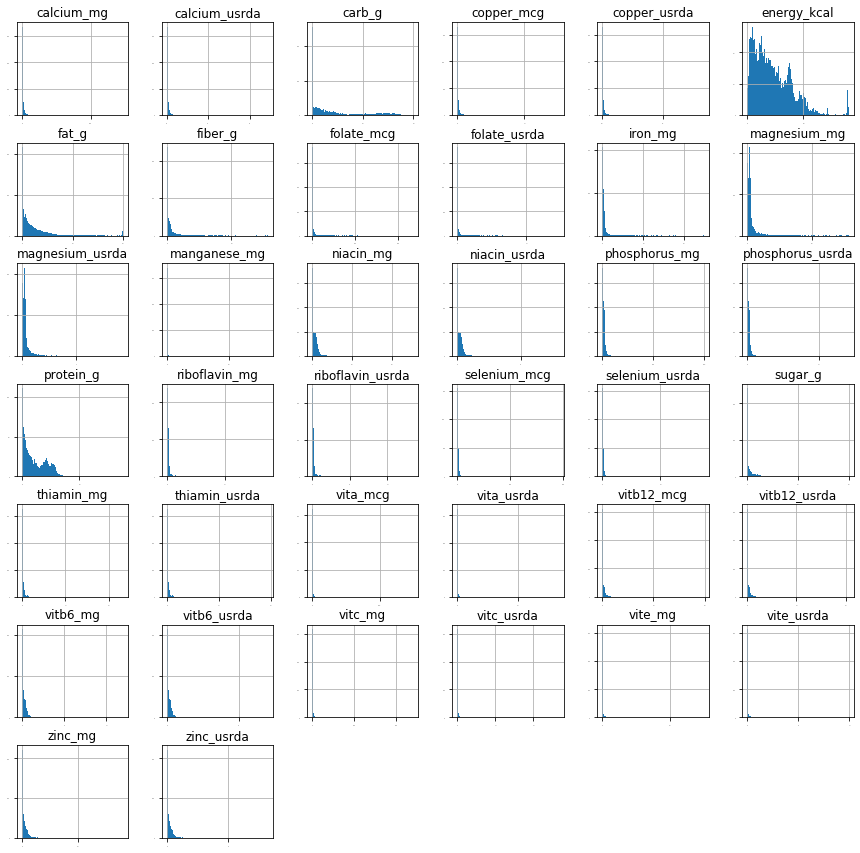

In [10]:
fig, axes = plt.subplots(figsize=(15, 15))
data.hist(bins=100, xlabelsize=0.5, ylabelsize=0.5, ax=axes)
plt.show()

Normalizing Features

In [12]:
# add 1 because data must be positive (we have many zeros)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

X = X + 1
df_TF = pd.DataFrame(index=X.index)
for i in X.columns.values:
    df_TF["%s_TF" % i] = boxcox(X.loc[:, i])[0]

df_TF = StandardScaler().fit_transform(X)
df_TF = pd.DataFrame(X, columns=X.columns)

C:\Users\Muneer\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


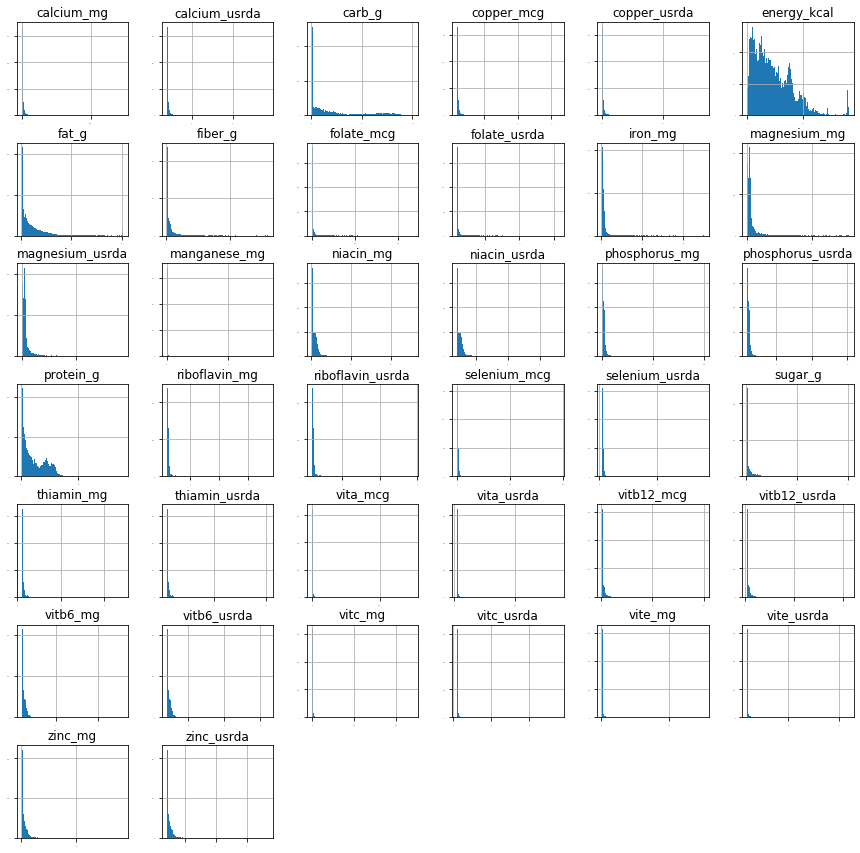

In [13]:
fig, axes = plt.subplots(figsize=(15, 15))
df_TF.hist(bins=100, xlabelsize=0.5, ylabelsize=0.5, ax=axes)
plt.show()

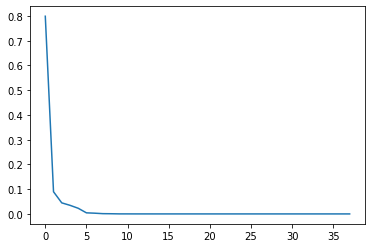

In [14]:
fit = PCA()
pca = fit.fit_transform(df_TF)
plt.plot(fit.explained_variance_ratio_)

In [36]:
print(fit.explained_variance_ratio_)
print(fit.explained_variance_ratio_[:3].sum())

[8.29958257e-01 9.03945455e-02 4.50187963e-02 2.42563410e-02
 4.51324824e-03 3.20924386e-03 1.13013046e-03 8.27311023e-04
 3.39711102e-04 1.33964779e-04 9.01195048e-05 4.63891610e-05
 2.78558798e-05 1.66700368e-05 1.47743188e-05 1.30597548e-05
 9.00568196e-06 2.46845362e-07 2.01147861e-07 1.28486281e-07]
0.9653715986655216


In [15]:
pca = pd.DataFrame(pca[:, :3], index=X.index, columns=["X1", "X2", "X3"])
pca = pca.join(y)
pca

,X1,X2,X3,foodgroup
0,588.697807,-44.531689,157.748001,Dairy and Egg Products
1,588.681431,-45.204268,157.972012,Dairy and Egg Products
2,744.991924,-42.011930,217.189383,Dairy and Egg Products
3,112.923042,474.544798,-118.281601,Dairy and Egg Products
4,209.137398,611.520224,-172.778548,Dairy and Egg Products
...,...,...,...,...
8613,-45.744352,74.497852,-22.779583,Finfish and Shellfish Products
8614,-89.813514,110.362040,-113.664185,Finfish and Shellfish Products
8615,-98.223874,-140.376183,21.440721,Sweets
8616,-64.417576,20.073067,-91.036886,Finfish and Shellfish Products


In [16]:
Components = fit.components_[:3]
Components = pd.DataFrame(Components, index=["X1", "X2", "X3"], columns=X.columns).T
Components

,X1,X2,X3
energy_kcal,6.491855e-03,2.180770e-01,3.539878e-01
protein_g,3.885064e-04,1.117443e-02,-4.503418e-03
fat_g,5.169662e-04,8.914514e-03,1.638047e-02
carb_g,1.971357e-04,2.777151e-02,5.904257e-02
sugar_g,2.064126e-04,5.870044e-03,1.728393e-02
fiber_g,5.138915e-05,4.677290e-03,4.786479e-03
vita_mcg,9.993507e-01,-2.628919e-02,-2.110315e-02
vitb6_mg,8.708954e-05,5.638631e-04,1.116870e-03
vitb12_mcg,3.223673e-03,1.044467e-03,1.061229e-03
vitc_mg,8.312038e-03,1.489758e-02,6.118644e-03


In [39]:
print(Components.sort_values("X1", axis=0, ascending=False).iloc[:, 0])
print("************************")
print(Components.sort_values("X2", axis=0, ascending=False).iloc[:, 1])
print("************************")
print(Components.sort_values("X3", axis=0, ascending=False).iloc[:, 2])

vita_mcg         0.999377
folate_mcg       0.027763
phosphorus_mg    0.016263
calcium_mg       0.010598
vitc_mg          0.008316
vitb12_mcg       0.003224
manganese_mg     0.003033
magnesium_mg     0.002090
selenium_mcg     0.001787
iron_mg          0.000797
fat_g            0.000494
copper_mcg       0.000405
protein_g        0.000386
zinc_mg          0.000319
vite_mg          0.000227
sugar_g          0.000199
carb_g           0.000173
vitb6_mg         0.000087
fiber_g          0.000050
thiamin_mg       0.000038
Name: X1, dtype: float64
************************
phosphorus_mg    0.688490
calcium_mg       0.682247
folate_mcg       0.220528
magnesium_mg     0.100280
carb_g           0.021302
vitc_mg          0.016975
selenium_mcg     0.014585
protein_g        0.011107
iron_mg          0.008516
fiber_g          0.004404
sugar_g          0.003676
zinc_mg          0.003549
fat_g            0.002110
vite_mg          0.001892
manganese_mg     0.001633
vitb12_mcg       0.001157
vitb6_mg      

In [40]:
print(pca.sort_values(by='X1', ascending=False)['foodgroup'][:100].value_counts())
print(pca.sort_values(by='X2', ascending=False)['foodgroup'][:100].value_counts())
print(pca.sort_values(by='X3', ascending=False)['foodgroup'][:100].value_counts())

Poultry Products                       19
Breakfast Cereals                      19
Vegetables and Vegetable Products       9
Lamb, Veal, and Game Products           8
Sausages and Luncheon Meats             8
Fats and Oils                           7
Beverages                               7
Beef Products                           5
Snacks                                  3
Spices and Herbs                        3
American Indian/Alaska Native Foods     2
Pork Products                           2
Dairy and Egg Products                  2
Finfish and Shellfish Products          2
Legumes and Legume Products             2
Baby Foods                              1
Baked Products                          1
Name: foodgroup, dtype: int64
Dairy and Egg Products                 34
Spices and Herbs                       16
Beverages                               9
Nut and Seed Products                   8
Breakfast Cereals                       8
Baby Foods                              7
Snac